<a href="https://colab.research.google.com/github/shreyamhetre/OIBSIP/blob/TASK2/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

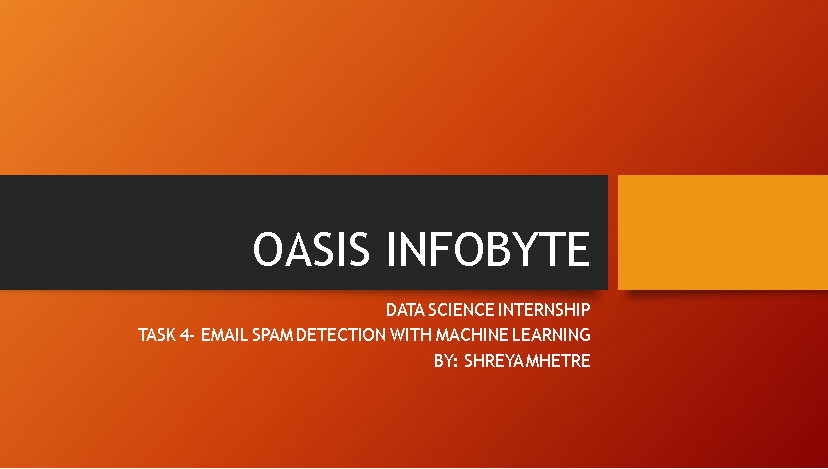

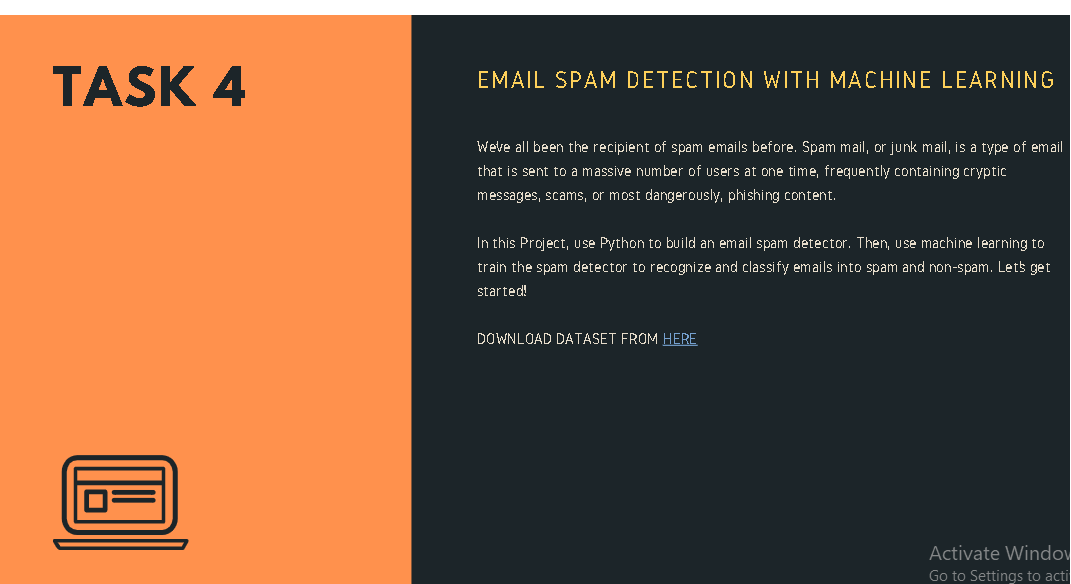

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/spam.csv" , encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#dropping null values
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [8]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df1.rename(columns = {"v1": "Spam", "v2": "Mail message"}, inplace = True)

In [10]:
df1.head()

,Spam,Mail message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df1.shape

(5572, 2)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['Spam'] = encoder.fit_transform(df1['Spam'])

In [13]:
#find duplicates
df1.duplicated().sum()

403

In [14]:
df1 = df1.drop_duplicates(keep = 'first')

In [15]:
#check if any duplicates are remaining
df1.duplicated().sum()

0

In [16]:
y = df1["Spam"]
x = df1["Mail message"]

In [17]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state = 0)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [20]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [21]:
#testing the mail
mail = ['same. wana plan a trip sometime then']
mail_count = cv.transform(mail)
y_predict = model.predict(mail_count)
y_predict

array([0])

In [22]:
#accuracy of training dataset
model.score(x_train_count,y_train)

0.9929866989117292

In [23]:
#accuracy of test dataset
x_test_count = cv.transform(x_test)
model.score(x_test_count,y_test)

0.9816247582205029